## Đề tài: Nhận diện biểu cảm, cảm xúc khuôn mặt (FER)

### 1. Lựa chọn dataset
Dataset: [FER2013](https://www.kaggle.com/datasets/msambare/fer2013)
- Dữ liệu bao gồm các hình ảnh thang độ xám 48x48 pixel của các khuôn mặt.

- Gồm 7 loại biểu cảm (0=Giận dữ, 1=Ghê tởm, 2=Sợ hãi, 3=Vui vẻ, 4=Buồn, 5=Ngạc nhiên, 6=Bình thường)

### 2. Facial Expression Recognition Using CNN with Keras


#### a. Import các thư viện cần thiết

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import regularizers
import matplotlib.pyplot as plt

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

#### b. Kiểm tra thư mục fer2013

- Trong thư mục fer2013 có 2 folder: test và train

In [2]:
import os


data_directory = "/kaggle/input/fer2013"
print(f"Danh sách folder trong thư mục fer2013:{os.listdir(data_directory)}")

train_directory = os.path.join(data_directory, "train")
test_directory = os.path.join(data_directory, "test")
print(f"folder trong tập train: {os.listdir(train_directory)}")
print(f"folder trong tập test: {os.listdir(test_directory)}")

Danh sách folder trong thư mục fer2013:['test', 'train']
folder trong tập train: ['surprise', 'fear', 'angry', 'neutral', 'sad', 'disgust', 'happy']
folder trong tập test: ['surprise', 'fear', 'angry', 'neutral', 'sad', 'disgust', 'happy']


#### c. Tạo các tập để huấn luyện từ dataset
- folder train tách thành tập train_ds và val_ds **(3 : 1)**
- folder test tách thành tập test

In [3]:
train_ds = keras.utils.image_dataset_from_directory(
    directory="/kaggle/input/fer2013/train",
    labels="inferred",
    label_mode="int",
    color_mode="rgb",
    batch_size=32,
    image_size=(48, 48),
    validation_split=0.25,
    subset="training",
    seed=123,
)
val_ds = keras.utils.image_dataset_from_directory(
    directory="/kaggle/input/fer2013/train",
    labels="inferred",
    label_mode="int",
    color_mode="rgb",
    batch_size=32,
    image_size=(48, 48),
    validation_split=0.25,
    subset="validation",
    seed=123,
)
test_ds = keras.utils.image_dataset_from_directory(
    directory = "/kaggle/input/fer2013/test",
    color_mode="rgb",
    batch_size=32,
    image_size=(48, 48)
)

Found 28709 files belonging to 7 classes.
Using 21532 files for training.
Found 28709 files belonging to 7 classes.
Using 7177 files for validation.
Found 7178 files belonging to 7 classes.


#### d. Kiểm tra các lable trong các tập huấn luyện

In [4]:
class_names = train_ds.class_names
print(class_names)

class_names = val_ds.class_names
print(class_names)

class_names = test_ds.class_names
print(class_names)

['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']


#### e. Hiển thị - kiểm tra dữ liệu

(32, 48, 48, 3) (32,)


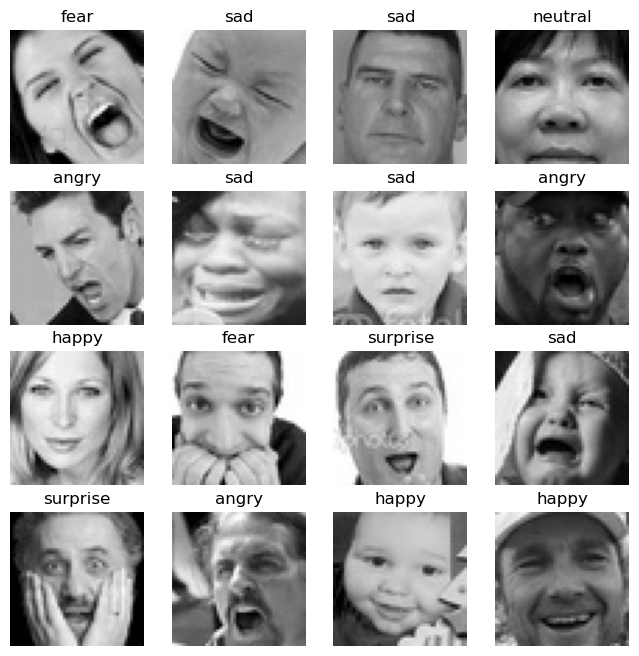

In [5]:
images, labels = next(iter(train_ds))
print(images.shape, labels.shape)

plt.figure(figsize=(8, 8))
for i in range(16):
    ax = plt.subplot(4, 4, i+1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

#### f. Modeling
##### - Tạo mô hình huấn luyện gồm các lớp Conv2D, MaxPool2D,....

In [6]:
model = keras.models.Sequential([    
    keras.layers.Conv2D(filters=32,kernel_size=3,activation="relu", padding="same", input_shape = (48,48,3)),
    keras.layers.Conv2D(filters=64,kernel_size=3,activation="relu", padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(2,2),
    keras.layers.Dropout(0.25),
    
    keras.layers.Conv2D(filters=64,kernel_size=3,activation="relu", padding="same"),
    keras.layers.Conv2D(filters=128,kernel_size=3,activation="relu", padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(2,2),
    keras.layers.Dropout(0.25),
    
    keras.layers.Conv2D(filters=128,kernel_size=3,activation="relu", padding="same"),
    keras.layers.Conv2D(filters=256,kernel_size=3,activation="relu", padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(2,2),
    keras.layers.Dropout(0.25),
    
    keras.layers.Conv2D(filters=256,kernel_size=3,activation="relu", padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(2,2),
    keras.layers.Dropout(0.25),
    
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation = "relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(7, activation = "softmax")
])



##### - Build model

In [7]:
model.compile(optimizer = "adam",
             loss = keras.losses.SparseCategoricalCrossentropy(),
             metrics=["accuracy"])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 64)        18496     
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 64)       256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 64)        3

##### - Vẽ sơ đồ tổng quát mô hình huấn luyện

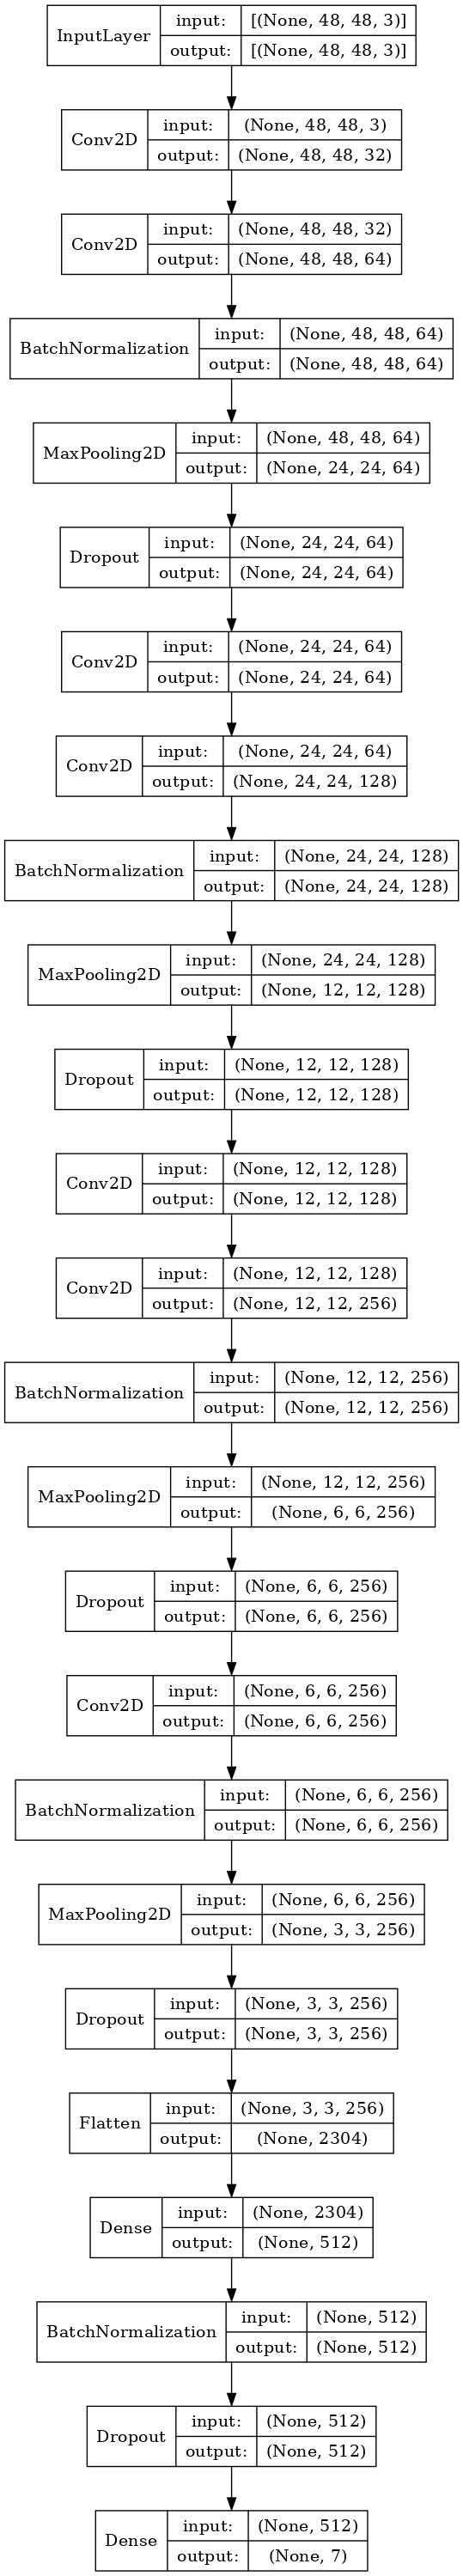

In [8]:
from tensorflow.keras.utils import plot_model


plot_model(model, show_shapes=True,
           show_layer_names=False,
           expand_nested=True,
           rankdir="TB",
           dpi=100)

##### - Tạo model_checkpoint và early_stopping

In [9]:
model_checkpoint = keras.callbacks.ModelCheckpoint(filepath="/checkpoint", 
                                                   save_weights_only=True, 
                                                   save_best_only=True, 
                                                   monitor="val_accuracy", 
                                                   mode="max")

early_stopping = keras.callbacks.EarlyStopping(monitor="val_accuracy", 
                                               patience=3, 
                                               mode="max")

### 3. Training 

In [10]:
hist = model.fit(train_ds, validation_data=val_ds, epochs=20,callbacks=[model_checkpoint,early_stopping], batch_size=64)

Epoch 1/20


2023-06-26 13:01:17.813087: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


673/673 [==============================] - 33s 36ms/step - loss: 1.9406 - accuracy: 0.2909 - val_loss: 1.6577 - val_accuracy: 0.3605
Epoch 2/20
673/673 [==============================] - 23s 34ms/step - loss: 1.5922 - accuracy: 0.3947 - val_loss: 1.5770 - val_accuracy: 0.3924
Epoch 3/20
673/673 [==============================] - 24s 35ms/step - loss: 1.3898 - accuracy: 0.4705 - val_loss: 1.5803 - val_accuracy: 0.4201
Epoch 4/20
673/673 [==============================] - 23s 33ms/step - loss: 1.2923 - accuracy: 0.5072 - val_loss: 1.2492 - val_accuracy: 0.5238
Epoch 5/20
673/673 [==============================] - 23s 34ms/step - loss: 1.2043 - accuracy: 0.5449 - val_loss: 1.2946 - val_accuracy: 0.5052
Epoch 6/20
673/673 [==============================] - 22s 33ms/step - loss: 1.1467 - accuracy: 0.5704 - val_loss: 1.2195 - val_accuracy: 0.5254
Epoch 7/20
673/673 [==============================] - 23s 34ms/step - loss: 1.0984 - accuracy: 0.5873 - val_loss: 1.1359 - val_accuracy: 0.5704
Epo

### 4. Load trạng thái tốt nhất của mô hình huấn luyện

In [11]:
model.load_weights("/checkpoint")

#### - Evaluate: val_ds sau khi lưu trạng thái tốt nhất của model trên tập train_ds

In [12]:
model.evaluate(val_ds)

225/225 [==============================] - 5s 23ms/step - loss: 1.0835 - accuracy: 0.6047


[1.0835362672805786, 0.6047095060348511]

### 5. Lưu model

In [13]:
model.save("model.h5")

### 6.  Plotting The Models's Accuracy and Val_Accuracy

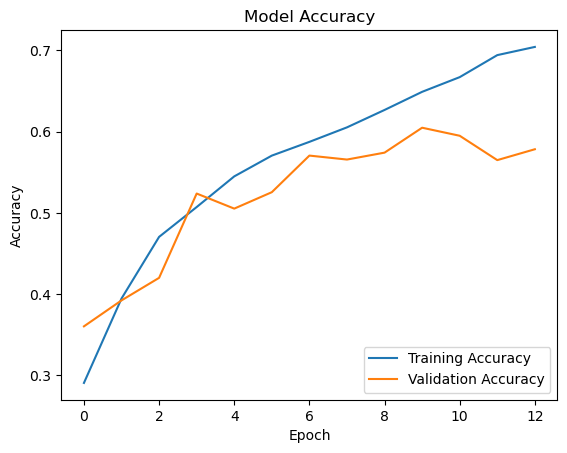

In [14]:
plt.plot(hist.history["accuracy"])
plt.plot(hist.history["val_accuracy"])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Training Accuracy", "Validation Accuracy"], loc="lower right")

### 7. Confusion Matrix

In [15]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix as sk_confusion_matrix

In [16]:
from tensorflow.keras.utils import to_categorical
from keras.metrics.accuracy_metrics import Accuracy, CategoricalAccuracy


accuracy = Accuracy()
categorical_accuracy = CategoricalAccuracy()
num_classes = 7
confusion_matrix = np.zeros((num_classes, num_classes))


for batch in test_ds.as_numpy_iterator():

    test_data, test_target = batch
    test_target = to_categorical(test_target, num_classes=num_classes)

    test_target_pred = model.predict(test_data, verbose=0)

    categorical_accuracy.update_state(test_target, test_target_pred)
    accuracy.update_state(test_target, test_target_pred)

    test_target_pred_labels = np.argmax(test_target_pred, axis=1)

    batch_confusion_matrix = sk_confusion_matrix(np.argmax(test_target, axis=1), test_target_pred_labels, labels=range(num_classes))
    confusion_matrix += batch_confusion_matrix

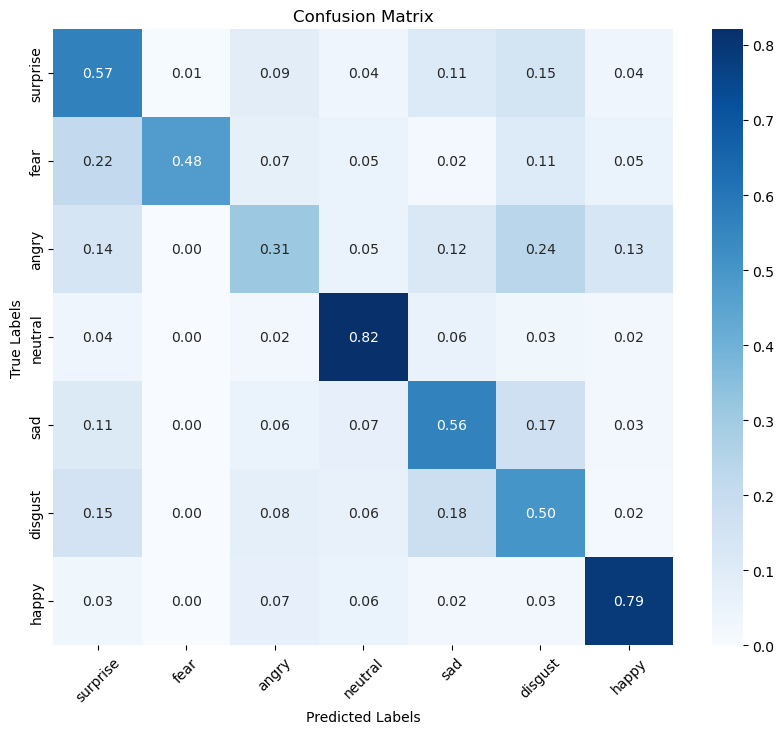

In [17]:
import seaborn as sns


expressions_list = os.listdir(train_directory)
normalized_confusion_matrix = confusion_matrix / confusion_matrix.sum(axis=1, keepdims=True)

fig, ax = plt.subplots(figsize=(10, 8))
heatmap = sns.heatmap(normalized_confusion_matrix, annot=True, fmt=".2f", cmap="Blues")
ax.set_xlabel("Predicted Labels")
ax.set_ylabel("True Labels")
ax.set_title("Confusion Matrix")

ax.xaxis.set_ticklabels(expressions_list)
ax.yaxis.set_ticklabels(expressions_list)

plt.xticks(rotation=45)

plt.show()

## Thử nghiệm hình ảnh thực tế

In [18]:
from keras.models import load_model

emotion_classifier = load_model("model.h5")

In [19]:
import cv2
from keras_preprocessing.image import img_to_array
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt


class_labels = ['happy', 'surprise', 'anger', 'neutral','sad ','fearful','worried']
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

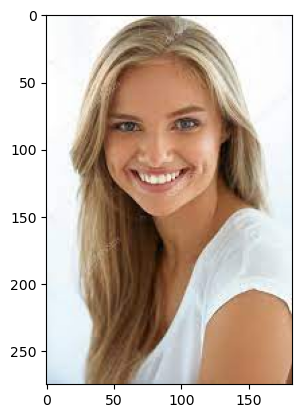

In [20]:
img = cv2.imread("/kaggle/input/image-test/image.jpg")
plt.imshow(cv2.cvtColor(np.array(img), cv2.COLOR_BGR2RGB))

In [21]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [22]:
faces = faceCascade.detectMultiScale(
        gray,
        scaleFactor=1.1,
        minNeighbors=5,
        minSize=(48, 48)
    )
for (x,y,w,h) in faces:
    cv2.rectangle(img,(x,y), (x+w, y+h), (0,255,0), 2)
face_check = img[ y:y+h, x:x+w]

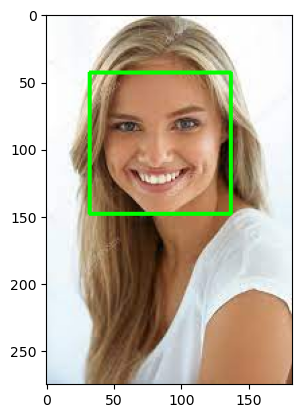

In [23]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

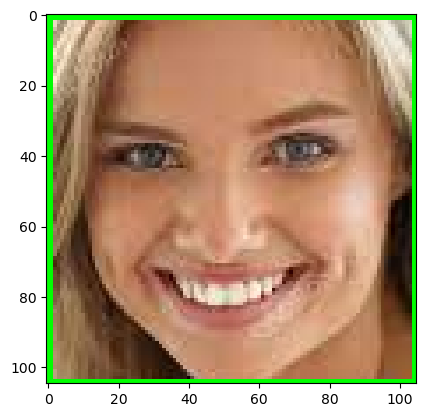

In [24]:
plt.imshow(cv2.cvtColor(face_check, cv2.COLOR_BGR2RGB))

In [25]:
face_check = cv2.resize(img, (48,48), interpolation = cv2.INTER_AREA)
face_check.shape

(48, 48, 3)

In [26]:
pip install keras_preprocessing

Note: you may need to restart the kernel to use updated packages.


In [27]:
face_check = face_check.astype('float')/255.0
face_check = img_to_array(face_check)
face_check = np.expand_dims(face_check,axis=0)


In [28]:
predictions = emotion_classifier.predict(face_check)[0]


1/1 [==============================] - 0s 421ms/step


In [29]:
label=class_labels[predictions.argmax()]
print()
print("Emotion: " + label)


Imotions: happy


### -------------------------------------

#### Fine-tuning

In [43]:
base_model = keras.applications.MobileNetV2(input_shape=(48,48,3),
                                            include_top=False,
                                            weights="imagenet"
                                           )
base_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 48, 48, 3)]  0           []                               
                                                                                                  
 Conv1 (Conv2D)                 (None, 24, 24, 32)   864         ['input_3[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 24, 24, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 24, 24, 32)   0           ['bn_Conv1[0][0]']               
                                                                               

In [44]:
base_model.trainable = True
len(base_model.layers)

154

In [45]:
for layer in base_model.layers[:100]:
    layer.trainable = False

base_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 48, 48, 3)]  0           []                               
                                                                                                  
 Conv1 (Conv2D)                 (None, 24, 24, 32)   864         ['input_3[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 24, 24, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 24, 24, 32)   0           ['bn_Conv1[0][0]']               
                                                                               

In [46]:
hist_fine = model.fit(train_ds, validation_data=val_ds, epochs=30, initial_epoch=hist.epoch[-1],
                      callbacks=[keras.callbacks.EarlyStopping(monitor="val_accuracy", mode="max", patience=3),
                                 keras.callbacks.ModelCheckpoint("./model/checkpoint", save_weights_only=True, save_best_only=True)
                                ]
                     )

Epoch 13/30
673/673 [==============================] - 23s 34ms/step - loss: 1.7996 - accuracy: 0.2974 - val_loss: 1.7574 - val_accuracy: 0.3203
Epoch 14/30
673/673 [==============================] - 24s 35ms/step - loss: 1.7501 - accuracy: 0.3112 - val_loss: 1.7196 - val_accuracy: 0.3341
Epoch 15/30
673/673 [==============================] - 22s 33ms/step - loss: 1.7196 - accuracy: 0.3180 - val_loss: 1.6912 - val_accuracy: 0.3416
Epoch 16/30
673/673 [==============================] - 22s 33ms/step - loss: 1.6984 - accuracy: 0.3307 - val_loss: 1.6695 - val_accuracy: 0.3483
Epoch 17/30
673/673 [==============================] - 22s 33ms/step - loss: 1.6810 - accuracy: 0.3406 - val_loss: 1.6562 - val_accuracy: 0.3545
Epoch 18/30
673/673 [==============================] - 23s 35ms/step - loss: 1.6637 - accuracy: 0.3439 - val_loss: 1.6454 - val_accuracy: 0.3625
Epoch 19/30
673/673 [==============================] - 22s 33ms/step - loss: 1.6574 - accuracy: 0.3449 - val_loss: 1.6347 - val_ac

In [47]:
model.load_weights("./model/checkpoint")
model.evaluate(test_ds)

225/225 [==============================] - 9s 37ms/step - loss: 1.5919 - accuracy: 0.3791


[1.5918757915496826, 0.37907496094703674]

### ----------------------------------------

In [48]:
img_batch, label_batch = next(iter(train_ds))
feature_batch = base_model(img_batch)
img_batch.shape,feature_batch.shape

(TensorShape([32, 48, 48, 3]), TensorShape([32, 2, 2, 1280]))

In [36]:
base_model.trainable = False
base_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 48, 48, 3)]  0           []                               
                                                                                                  
 Conv1 (Conv2D)                 (None, 24, 24, 32)   864         ['input_1[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 24, 24, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 24, 24, 32)   0           ['bn_Conv1[0][0]']               
                                                                               

In [49]:
global_avg_layer = keras.layers.GlobalAveragePooling2D()
feature_batch_avg = global_avg_layer(feature_batch)

In [50]:
prediction_layer = keras.layers.Dense(7)
prediction_batch = prediction_layer(feature_batch_avg)

In [51]:
data_augmentation = keras.Sequential([
    keras.layers.RandomFlip("horizontal"),
    keras.layers.RandomRotation(0.2)
])

In [52]:
inputs = keras.Input(shape=(48, 48, 3))
x = data_augmentation(inputs)
x = keras.layers.Rescaling(scale=1./127.5, offset=-1)(x)
x = base_model(x) 
x = global_avg_layer(x) 
outputs = prediction_layer(x)
model = keras.Model(inputs, outputs)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 sequential_2 (Sequential)   (None, 48, 48, 3)         0         
                                                                 
 rescaling_1 (Rescaling)     (None, 48, 48, 3)         0         
                                                                 
 mobilenetv2_1.00_224 (Funct  (None, 2, 2, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d_1   (None, 1280)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_3 (Dense)             (None, 7)                 8967

In [53]:
base_learning_rate = 0.0001
model.compile(optimizer=keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=["accuracy"]
             )

In [54]:
hist = model.fit(train_ds, validation_data=val_ds, epochs=30,
                 callbacks=[keras.callbacks.EarlyStopping(monitor="val_accuracy", mode="max", patience=3),
                            keras.callbacks.ModelCheckpoint("./model/checkpoint", save_weights_only=True, save_best_only=True)
                           ], batch_size=64
                )

Epoch 1/30
673/673 [==============================] - 37s 36ms/step - loss: 1.8353 - accuracy: 0.2967 - val_loss: 4.4106 - val_accuracy: 0.2835
Epoch 2/30
673/673 [==============================] - 24s 35ms/step - loss: 1.6158 - accuracy: 0.3664 - val_loss: 2.3149 - val_accuracy: 0.3517
Epoch 3/30
673/673 [==============================] - 23s 34ms/step - loss: 1.5499 - accuracy: 0.3966 - val_loss: 1.6542 - val_accuracy: 0.4304
Epoch 4/30
673/673 [==============================] - 23s 34ms/step - loss: 1.5027 - accuracy: 0.4165 - val_loss: 1.5519 - val_accuracy: 0.4407
Epoch 5/30
673/673 [==============================] - 22s 33ms/step - loss: 1.4616 - accuracy: 0.4355 - val_loss: 1.5943 - val_accuracy: 0.4329
Epoch 6/30
673/673 [==============================] - 23s 34ms/step - loss: 1.4283 - accuracy: 0.4492 - val_loss: 1.4142 - val_accuracy: 0.4701
Epoch 7/30
673/673 [==============================] - 23s 34ms/step - loss: 1.4021 - accuracy: 0.4595 - val_loss: 1.4064 - val_accuracy:

In [55]:
model.load_weights("./model/checkpoint")
model.evaluate(test_ds)

225/225 [==============================] - 9s 38ms/step - loss: 1.3505 - accuracy: 0.4889


[1.3504741191864014, 0.4888548254966736]